In [1]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=ba4d846e40ec90e1a5c8d631f4c33129f3ceb5399ad6d09e76199a881b6a49f6
  Stored in directory: c:\users\ayvee\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


#Importing the required libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

import re
import nltk
from nltk.corpus import stopwords
import string                                       #to remove punctuations in out sentences
string.punctuation

import nltk 
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import files                        #import of files from local disk
import io

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ayvee\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


ModuleNotFoundError: No module named 'google'

In [8]:
!kaggle datasets download codeserra09/twitter-us-airline-sentiment-lg-mnb-dt-rf-knn -p /path/to/dest

Traceback (most recent call last):
  File "C:\Users\Ayvee\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Ayvee\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Ayvee\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Ayvee\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Ayvee\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Ayvee\.kaggle. Or use the environment method.


#Loading the Dataset

In [9]:
data = files.upload()           #uploading csv files
%matplotlib inline

NameError: name 'files' is not defined

In [ ]:
df = pd.read_csv(io.StringIO(data['Tweets.csv'].decode('utf-8')))   

In [ ]:
df_tweets = df
df_tweets.shape

(14640, 15)

Below are the columns in the dataset.

In [ ]:
df_tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

To Check if any of the column has unique value.

In [ ]:
unique_val = [featr for featr in df_tweets.columns if len(df_tweets[featr].unique()) <2]
unique_val

[]

Check for missing value.

In [ ]:
100*df_tweets.isna().sum()/len(df_tweets)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

As per the above results, airline_sentiment_gold, negativereason_gold and tweet_coord have more tha 90% of missing values. Therefore we will drop them as they don't provide any valuable feedback.

In [ ]:
df_tweets.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace =True)

In [ ]:
100*df_tweets.isna().sum()/len(df_tweets)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

Columns, 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord' are dropped from dataframe successfully.

In [ ]:
df_tweets[['negativereason', 'negativereason_confidence', 'tweet_location', 'user_timezone']].head()

,negativereason,negativereason_confidence,tweet_location,user_timezone
0,NaN,NaN,NaN,Eastern Time (US & Canada)
1,NaN,0.0000,NaN,Pacific Time (US & Canada)
2,NaN,NaN,Lets Play,Central Time (US & Canada)
3,Bad Flight,0.7033,NaN,Pacific Time (US & Canada)
4,Can't Tell,1.0000,NaN,Pacific Time (US & Canada)


#Exploratory Data Analysis (EDA) 

In [ ]:
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

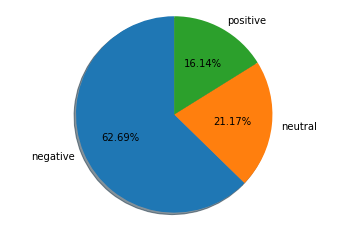

In [ ]:
createPieChartFor(df_tweets.airline_sentiment)

#As seen above, we have a majority of negative comments (63%) followed by neutral (21%) and positive (16%).

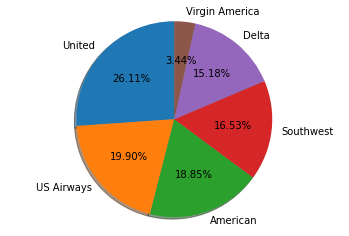

In [ ]:
createPieChartFor(df_tweets.airline)


#Above figure shows the percent of tweets for the each Airlines. The United Airline is having the highest tweet followed by US Airways and American Airlines.

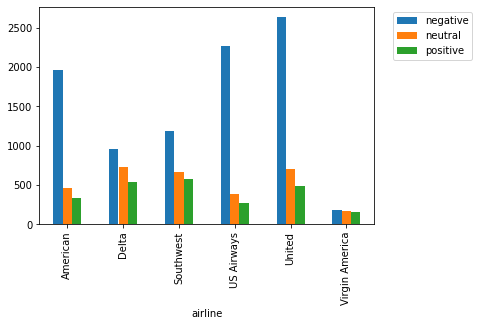

In [ ]:
airline_sentiment_df = df_tweets.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

From the above figures, we analyse the total count for the tweets for the each airlines with respect to Negative, Positive and Neutral.

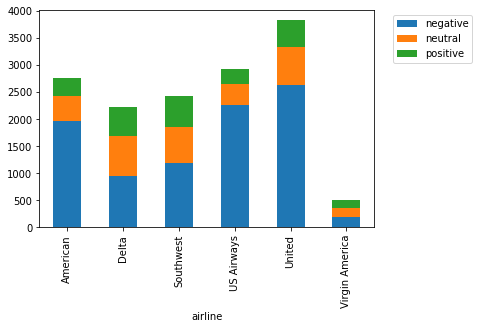

In [ ]:
airline_sentiment_df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#Insights from the above graph:

1.   United, US Airways, and American have all seen significantly more unfavorable tweets.
2.   Tweets from Virgin America, Delta, and Southwest are fairly balanced.



#Below are the resons for negative sentiment.

In [ ]:
print(df_tweets.negativereason.unique())


[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [ ]:
print(df_tweets[df_tweets.negativereason == '']['airline_sentiment'].unique())
print(df_tweets[df_tweets.negativereason != '']['airline_sentiment'].unique())

[]
['neutral' 'positive' 'negative']


In [ ]:
df_neg = df_tweets[df_tweets.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head())

(9178, 12)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


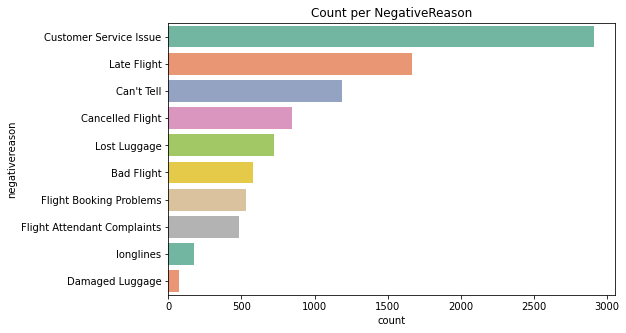

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df_neg, y = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index)

# plt.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

The key cause for the airlines' poor reputation is their poor customer service.



In [ ]:
df_tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

#The information below is categorized in detail by airline name.

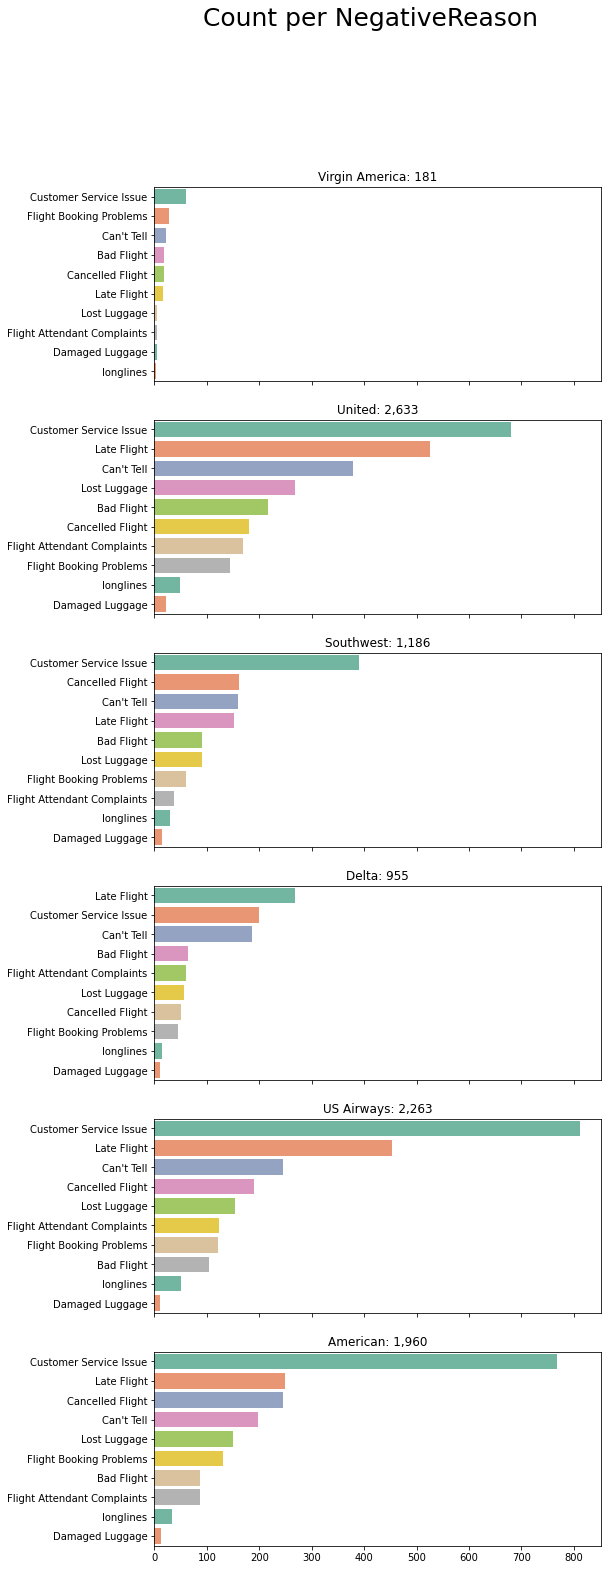

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)
axes = axes.flatten()
names = df_neg['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = df_neg[df_neg.airline==name], y = 'negativereason',
                       palette='Set2',
                       order = df_neg[df_neg.airline==name].negativereason.value_counts().index, ax = n)
    # ax.bar_label(ax.containers[0])
    ax.set_title(f"{name}: {format(len(df_neg[df_neg.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("Count per NegativeReason", fontsize = 25)
plt.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    temp_df = df_tweets[df_tweets.airline_sentiment==sentiment]
    words = " ".join(temp_df.text)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

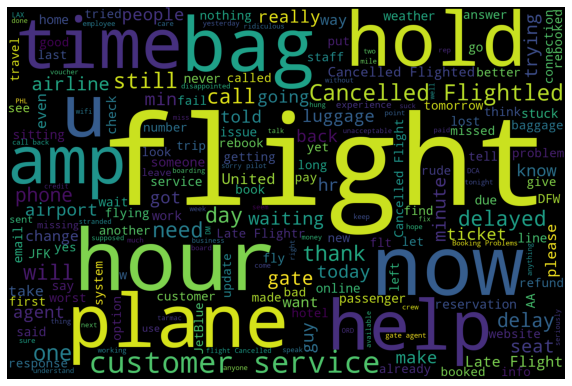

In [ ]:
createWrdCloudForSentiment('negative')


In [ ]:
data = files.upload()           #uploading csv files

Saving tweet.png to tweet.png


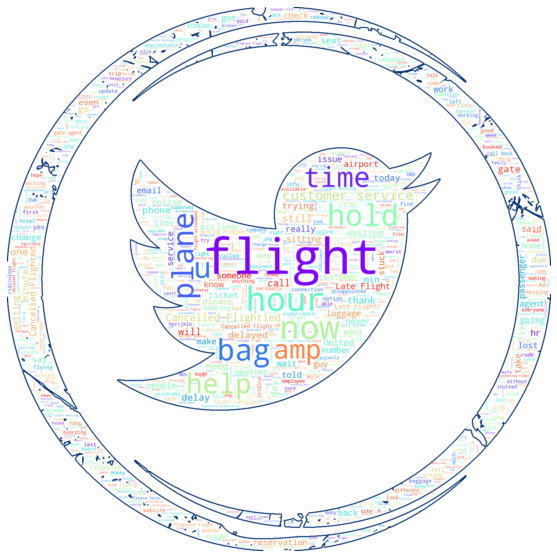

In [ ]:
from PIL import Image
data = pd.read_csv("Tweets.csv")

stopwords = set(STOPWORDS)
#text = " ".join(text for text in data.description)

mask_image = np.array(Image.open("tweet.png"))
#mask_image = color.rgb2gray(mask_image)

temp_df = df_tweets[df_tweets.airline_sentiment=='negative']
words = " ".join(temp_df.text)
cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

mask = np.array(Image.open("tweet.png"))
wordcloud = WordCloud(background_color='white', max_words=1000, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(cleaned_words)
# create image as cloud
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file

plt.show()

We observe that **'flight', 'hour', 'hrlp', 'time' 'hold', 'bag', 'plane'** are present more frequently in negative statements.

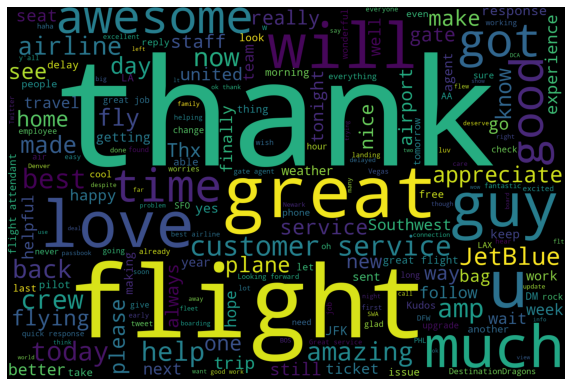

In [ ]:
createWrdCloudForSentiment('positive')

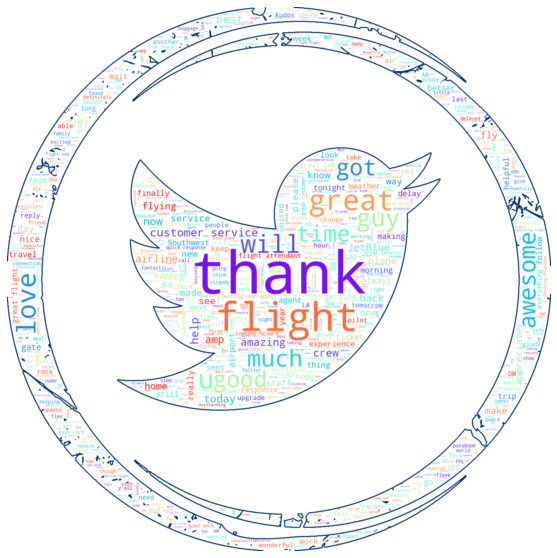

In [ ]:
data = pd.read_csv("Tweets.csv")

stopwords = set(STOPWORDS)
#text = " ".join(text for text in data.description)

mask_image = np.array(Image.open("tweet.png"))
#mask_image = color.rgb2gray(mask_image)

temp_df = df_tweets[df_tweets.airline_sentiment=='positive']
words = " ".join(temp_df.text)
cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

mask = np.array(Image.open("tweet.png"))
wordcloud = WordCloud(background_color='white', max_words=1000, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(cleaned_words)
# create image as cloud
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file

plt.show()

We observe that **'thank', 'flight', 'great', 'will', 'awesome' 'love'** are present more frequently in positve statements.

In [ ]:
df_neg = df_tweets[df_tweets.airline_sentiment == 'positive']
display(df_neg.shape, df_neg.head())

(2363, 12)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,2015-02-24 10:30:40 -0800,NYC,America/New_York


#Text Classification Using Naive Bayes

In [ ]:
df_tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df_tweets.shape

(14640, 12)

In [ ]:
df_tweets.dropna #dropping every row having "NaN" from dataframe

<bound method DataFrame.dropna of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

value counts for each sentence type
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


<BarContainer object of 3 artists>

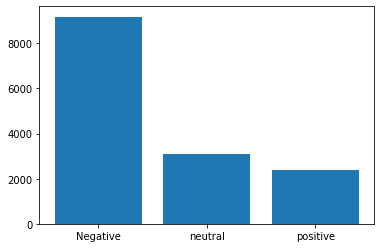

In [ ]:
Y = df['airline_sentiment'].value_counts()
# X = np.unique(df['Type'])
print("value counts for each sentence type\n", Y) 
# print(X)
X = ['Negative', 'neutral', 'positive']
# plt.bar(df['Type'], df['Type'].value_counts())
plt.bar(X, df['airline_sentiment'].value_counts())

#Removing punctuations and convering them to lowercase Lemmatizing the words

In [ ]:
from nltk.corpus.reader import wordnet
import nltk                                 #imports for Lemmatization
nltk.download('stopwords')  
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
def Remove_punctuation(t):
  pf_t = "".join([ i for i in t if i not in string.punctuation])
  removeL=""
  res = re.sub('','',pf_t)          #remove HTML tags
  res = re.sub('https://.*','',res)   #remove URLs
  res = re.sub(r'[^w'+removeL+']', ' ',res)    #remove non-alphanumeric characters 
  return pf_t

def extraction(df):
  stop_word_list = set(stopwords.words('english'))
  pd.set_option('display.max_colwidth', -1)
  df = df[['text']]
  df['text'] = df['text'].apply(lambda x: Remove_punctuation(x))            #calling function to Remove punctuations, HTML tags, URLs, non-alphanumeric characters
  df['text'] = df['text'].apply(lambda x: x.lower())                  #converting each sentence to lower case
  df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_word_list)]))   #removing stopwords
  return df
data = extraction(df)       #printing value counts for each class
data.shape  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(14640, 1)

In [ ]:
data.head()

,text
0,virginamerica dhepburn said
1,virginamerica plus youve added commercial experience tacky
2,virginamerica didnt today must mean need take another trip
3,virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse
4,virginamerica really big bad thing


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(df_tweets['airline_sentiment'])
data['airline_sentiment'].unique()

array([1, 2, 0])

# 0 = Negative Review
# 1 = Neutral Review
# 2 = Positive Review

In [ ]:

Data = data['text'].values
target = data['airline_sentiment'].values
for i in range(10):
  print(target[i], data['airline_sentiment'][i])
Dict1 = { 0: 'Negative', 1:'Neutral', 2:'Positive'}

1 1
2 2
1 1
0 0
0 0
0 0
2 2
1 1
2 2
2 2


 Validating:- To make sure that we have the correct labels and target type

In [ ]:
print(Dict1)

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(Data, target, test_size = 0.2, stratify = target )
# X_val, X_test , y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, stratify = y_val)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer                   #for comparision with Naive Bayes Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data.head()

,text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus youve added commercial experience tacky,2
2,virginamerica didnt today must mean need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse,0
4,virginamerica really big bad thing,0


Multinomial Naive Bayes. The Multinomial Naive Bayes can be accepted as the probabilistic approach to classifying documents in the case of acknowledging the frequency of a specified word in a text

In [ ]:
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb.fit(X_train, y_train)
preds_new = nb.predict(X_test)


#Naive Bayes Accuracy 

In [ ]:
acc = accuracy_score(preds_new , y_test )
print(acc)

0.6745218579234973


In [ ]:
dt = pd.DataFrame({'Review Text' : X_test, 'Review Type' : preds_new})

In [ ]:
dt.head()

,Review Text,Review Type
0,americanair weve hold hour,0
1,jetblue believing minute got delayed 3rd time,0
2,usairways im researching flight amp noticed small issue wclass service site amp site could reservation help,0
3,united send someone customer service counter person dia concourse b across gate b36a,0
4,americanair travel tomorrow cancelled flightled stupidly rebooked tomorrow cant get reservation,0


value counts for each sentence type
 0    2751
1    98  
2    79  
Name: Review Type, dtype: int64


<BarContainer object of 3 artists>

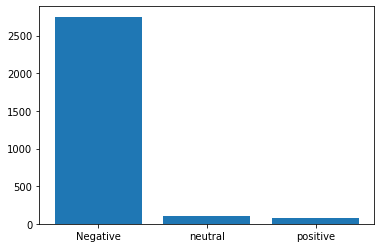

In [ ]:
Y = dt['Review Type'].value_counts()
# X = np.unique(df['Type'])
print("value counts for each sentence type\n", Y) 
# print(X)
X = ['Negative', 'neutral', 'positive']
# plt.bar(df['Type'], df['Type'].value_counts())
plt.bar(X, dt['Review Type'].value_counts())

##Text Classification Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(X_train).toarray()

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y_train)
preds = clf.predict(vectorizer.transform(X_test).toarray())

#Random Forest Accuracy




In [ ]:
acc = accuracy_score(preds , y_test)
print(acc)

0.7527322404371585


In [ ]:
dt_rfc = pd.DataFrame({'Review Text' : X_test, 'Review Type' : preds})
dt_rfc.head()

,Review Text,Review Type
0,americanair weve hold hour,0
1,jetblue believing minute got delayed 3rd time,0
2,usairways im researching flight amp noticed small issue wclass service site amp site could reservation help,0
3,united send someone customer service counter person dia concourse b across gate b36a,0
4,americanair travel tomorrow cancelled flightled stupidly rebooked tomorrow cant get reservation,0


value counts for each sentence type
 0    2137
1    428 
2    363 
Name: Review Type, dtype: int64


<BarContainer object of 3 artists>

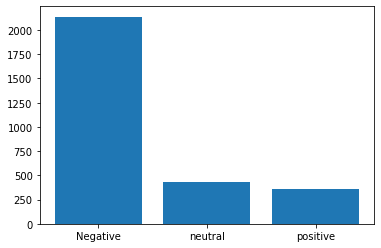

In [ ]:
Y = dt_rfc['Review Type'].value_counts()
# X = np.unique(df['Type'])
print("value counts for each sentence type\n", Y) 
# print(X)
X = ['Negative', 'neutral', 'positive']
# plt.bar(df['Type'], df['Type'].value_counts())
plt.bar(X, dt_rfc['Review Type'].value_counts())

After comapring Naive Bayes and Random Forest, the accuracy for random forest is higher.

#References


1.   Naive Bayes Text Classification:
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a
2.   Random Forest Text Classification: 
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

